In [150]:
import json
import requests
import pandas as pd
import numpy as np

# Downloading PubChem bioassay data for GPR55

Some of this is difficult to script so this notebook contains points where the user should write a file and upload it to one of PubChem's websites. 

First up, get all the assay data _summaries_ for GPR55 in PubChem. GPR55 has `geneid:9290`. Some of these assays aren't measuring chemical bioactivity, so they can be removed. Loop through these assays and save the relevant assay IDs. 

In [12]:
site = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/target/geneid/9290/aids/JSON'
data = json.loads(requests.get(site).content)

In [74]:
aids = list()
names = list()
df = pd.DataFrame(columns = ['name', 'aid', 'hasscore', 'method', 'sidcountall', 'sidcountactive',
                             'sidcountinactive', 'sidcountinconclusive'])
assays = list()
for aid in data['IdentifierList']['AID']:
    site = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/'+str(aid)+'/summary/JSON'
    assay_data = json.loads(requests.get(site).content)['AssaySummaries']['AssaySummary'][0]
    
    try:
        
        name = assay_data['Name']
        
        if 'GPR55' in name:
            print(name)
            hasscore = assay_data['HasScore']
            method = assay_data['Method']
            sidcountall = assay_data['SIDCountAll']
            sidcountactive = assay_data['SIDCountActive']
            sidcountinactive = assay_data['SIDCountInactive']
            sidcountinconclusive = assay_data['SIDCountInconclusive']

            df.loc[len(df)] = [name, aid, hasscore, method, sidcountall, sidcountactive, sidcountinactive,
                           sidcountinconclusive]
            assays.append(cb)
            
    except:
        print('failed', aid)
        None

Image-based HTS for Selective Agonists of GPR55
Summary of Image-based HTS for Selective Agonists of GPR55
Image-Based HTS for Selective Antagonists for GPR55
Summary of Image-based HTS for Selective Antagonists of GPR55
SAR analysis of selective Agonists of GPR55 using an Image-Based Assay
SAR Analysis of Selective Antagonists of GPR55 using an Image-Based Assay
SAR Analysis of Selective Antagonists of GPR55 using an Image-Based Assay - Set 2
SAR analysis of selective Agonists of GPR55 using an Image-Based Assay - Set 2
SAR Analysis for the identification of Selective Agonists of GPR55 using an Image-Based Screen
SAR Analysis of Selective Antagonists of GPR55 using an Image-Based Assay - Set 3
Binding affinity to GPR55
SAR analysis of Agonists of GPR55 using MAPK Activation Assay
SAR Analysis of Selective Antagonists of GPR55 using an Image-Based Assay - Set 4
SAR Analysis for the identification of Selective Antagonists of GPR55 using an Image-Based Screen
Agonist activity at GPR55 (u

In [ ]:
df.to_csv('gpr55_aids.csv', header=None, index=False)

# Use PubChem query to download bioactivity data

The assay IDs from the file above should be uploaded to PubChem. On the front page of [PubChem](https://pubchem.ncbi.nlm.nih.gov), click `Upload ID`, select `AID` as the type of IDs to upload, and upload the file (`gpr55_aids.csv`). 

You can then download a csv file with all bioactivities from the relevant assays. The `Activity` column is what stores the yes/no activity responses. 


In [134]:
bioassay_activities = pd.read_csv('PubChem_bioactivity_composite_query_gpr55_aids.csv')

In [136]:
bioassay_activities['activity'].unique()

array(['Inactive', 'Inconclusive', 'Active', 'Probe', 'Unspecified'],
      dtype=object)

# Use PubChem to translate predicted chemicals into CIDs

PubChem has a handy [identifier exchange] service. We have ChEMBL IDs associated with the top 2000 predicted hits. Simply upload the ChEMBL IDs on that service to return CID (compound IDs) with which to match up the assay data. 

The CIDs returned by this list (`predicted_smiles_CIDs.tsv`) can be used to filter the results as demonstrated below.

In [169]:
predicted_activities = pd.read_csv('predicted_smiles_CIDs.tsv', sep='\t', header=None)
predicted_activities.columns = ['smiles', 'cid']

#Don't need to make CIDs into int:
#predicted_activities = predicted_activities[~pd.isna(predicted_activities['cid'])]
#predicted_activities['cid'] = predicted_activities['cid'].astype(int)

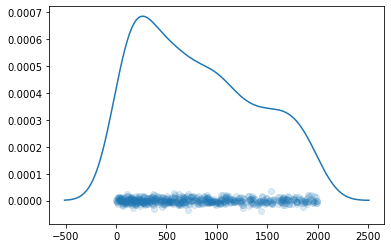

In [180]:
from seaborn import kdeplot
import matplotlib.pyplot as plt
%matplotlib inline
points = predicted_activities['cid'].isin(activites['cid'][activites['activity']=='Inactive']).to_numpy().nonzero()[0]
kdeplot(points)
plt.scatter(points, np.random.randn(len(points))*0.00001, alpha=0.15)


In [182]:
points_pos = predicted_activities['cid'].isin(activites['cid'][activites['activity']=='Active']).to_numpy().nonzero()[0]
points_neg = predicted_activities['cid'].isin(activites['cid'][activites['activity']=='Inactive']).to_numpy().nonzero()[0]

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


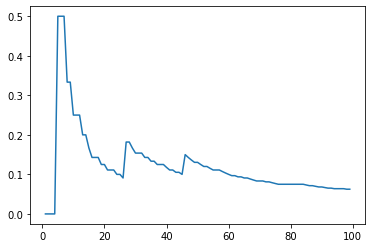

In [187]:
plt.plot([sum(points_pos<i)/sum(points_neg<i) for i in range(100)])

In [177]:
smi = predicted_activities[predicted_activities['cid'].isin(activites['cid'][activites['activity']=='Active'])].smiles

In [189]:
points_neg

array([   0,    1,    7,    9,   12,   14,   15,   18,   20,   23,   25,
         28,   29,   32,   34,   36,   39,   40,   42,   44,   46,   47,
         48,   50,   51,   53,   54,   57,   58,   59,   60,   62,   64,
         66,   67,   68,   71,   73,   74,   75,   84,   85,   87,   88,
         90,   91,   93,   97,   99,  104,  106,  108,  110,  112,  113,
        114,  115,  121,  122,  124,  126,  133,  134,  135,  136,  137,
        139,  140,  141,  144,  145,  146,  147,  148,  149,  153,  154,
        157,  160,  161,  163,  164,  165,  167,  171,  172,  173,  179,
        180,  181,  184,  186,  188,  190,  191,  194,  196,  197,  198,
        200,  201,  203,  204,  205,  207,  208,  212,  214,  220,  222,
        223,  224,  227,  228,  230,  234,  239,  243,  245,  247,  248,
        249,  252,  253,  255,  259,  262,  267,  268,  269,  271,  274,
        277,  278,  279,  280,  281,  284,  287,  288,  289,  290,  292,
        302,  305,  306,  308,  311,  320,  321,  3

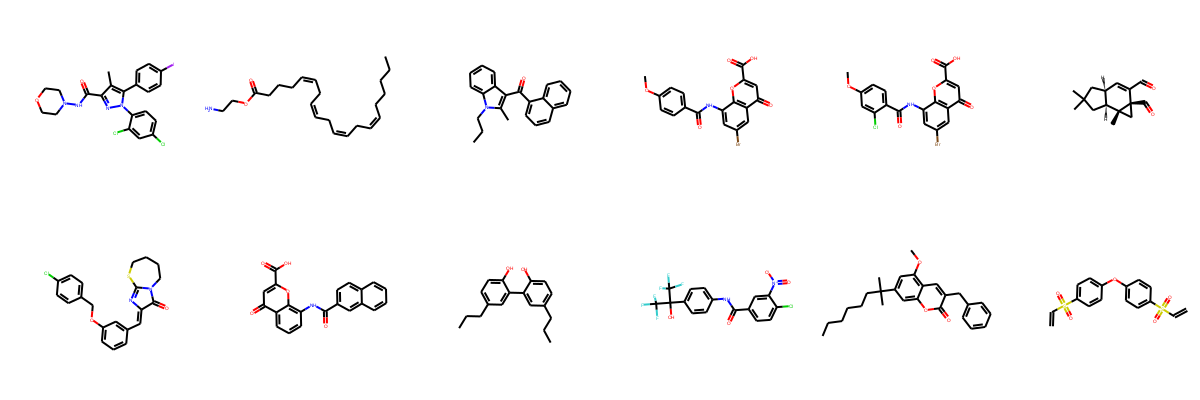

In [178]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, AllChem, rdFingerprintGenerator, PandasTools
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import DataStructs

mols = [Chem.MolFromSmiles(i) for i in smi]
Draw.MolsToGridImage(mols, molsPerRow=6)


assay domain < namespace > = aid | listkey | type/< assay type > | sourceall/< source name > | target/< assay target > | activity/< activity column name >

< assay type > = all | confirmatory | doseresponse | onhold | panel | rnai | screening | summary | cellbased | biochemical | invivo | invitro | activeconcentrationspecified

< assay target > = gi | proteinname | geneid | genesymbol | accession

< identifiers > = comma-separated list of positive integers (e.g. cid, sid, aid) or identifier strings (source, inchikey, formula); in some cases only a single identifier string (name, smiles, xref; inchi, sdf by POST only)

In [ ]:
'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2244/property/MolecularFormula,InChIKey/[<output specification>]'

 

assay domain < operation specification > = record | concise | aids | sids | cids | description | targets/< target type > | < doseresponse > | summary | classification

In [237]:
site = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/1961/JSON'
#site = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/260895/concise/CSV'
data = json.loads(requests.get(site).content)
data

{'Fault': {'Code': 'PUGREST.BadRequest',
  'Message': 'Too many SIDs',
  'Details': ['Assay record retrieval is limited to 10000 SIDs']}}

In [230]:
data['PC_AssaySubmit']['data'])

28

In [204]:
site = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/target/genesymbol/egfr/concise/CSV'
data=requests.get(site).content

In [205]:
data

b'Status: 504\nCode: PUGREST.Timeout\nMessage: Request timed out\n'

In [239]:
from pubchempy import *

In [240]:
d = get_assays(1961)

In [244]:
a = d[0]

In [248]:
a.record

{'assay': {'descr': {'aid': {'id': 1961, 'version': 2},
   'aid_source': {'db': {'name': 'Burnham Center for Chemical Genomics',
     'source_id': {'str': 'BCCG-A221-GPR55-Agonist-Assay'}}},
   'name': 'Image-based HTS for Selective Agonists of GPR55',
   'description': ['Data Source: Sanford-Burnham Center for Chemical Genomics (SBCCG)',
    'Source Affiliation: Sanford-Burnham Medical Research Institute (SBMRI, San Diego, CA)',
    'Network: NIH Molecular Libraries Probe Production Centers Network (MLPCN)',
    'Grant Proposal Number: 1X01 DA026205-01 ',
    'Assay Provider: Dr. Mary Abood, California Pacific Medical Center Research Institute (currently Temple University)',
    '',
    'The cannabinoid and endocannabinoid system has been implicated in the pathophysiology of drug dependence and addiction disorders.  GPR55, an orphan G-Protein Coupled Receptor, has been reported to be a cannabinoid receptor, but its status as such remains unresolved due to conflicting results from phar